# Anomaly Detection

## Isolation Forest

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df = pd.read_csv('./synthetic_dataset_isolation_forest.csv')
df.head()

,feature_1,feature_2
0,0.496714,-0.828995
1,-0.138264,-0.560181
2,0.647689,0.747294
3,1.523030,0.610370
4,-0.234153,-0.020902


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  300 non-null    float64
 1   feature_2  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [13]:
# Count missing values
df.isnull().sum()

feature_1    0
feature_2    0
dtype: int64

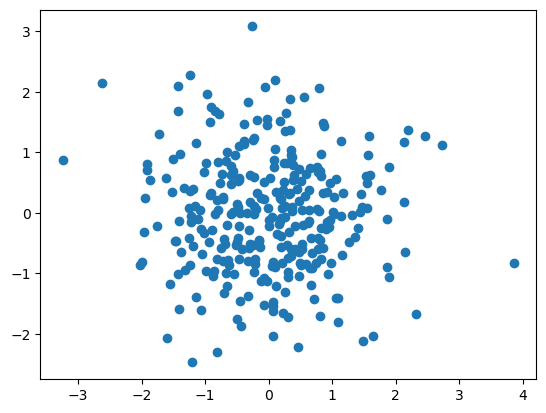

In [14]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [15]:
from sklearn.ensemble import IsolationForest

In [16]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

In [17]:
predictions

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1

In [19]:
index = np.where(predictions < 0)
index

(array([  6,  13,  14,  23,  31,  37,  47,  49,  73,  74,  78,  79,  82,
         87,  93,  96, 100, 106, 110, 113, 118, 120, 121, 125, 129, 130,
        131, 138, 142, 156, 160, 167, 171, 178, 179, 182, 199, 201, 202,
        209, 220, 221, 225, 231, 234, 236, 244, 248, 252, 261, 262, 266,
        267, 268, 271, 275, 282, 283, 284, 285]),)

In [20]:
x = df.values

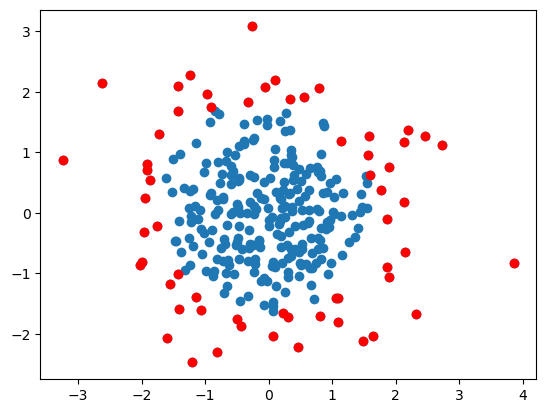

In [21]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index, 0], x[index, 1], color='r')

## DBSCAN

In [22]:
from sklearn.datasets import make_circles

In [23]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

In [24]:
X

array([[-0.87027961, -0.44363605],
       [ 1.08892393,  0.03239131],
       [-0.03594096,  0.27851377],
       ...,
       [ 0.47275741, -0.13508013],
       [ 0.34746414,  0.13092786],
       [ 0.14273197,  0.26842341]])

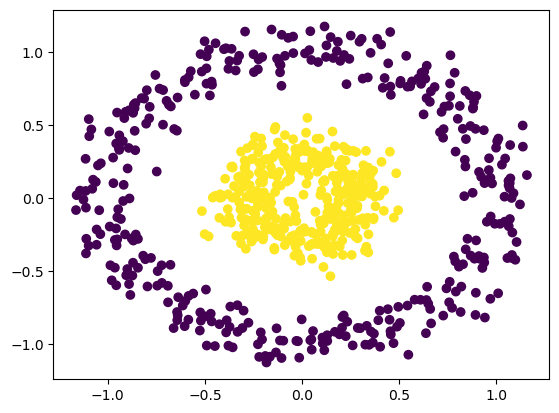

In [26]:
plt.scatter(X[:,0], X[:,1], c=y)

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
dbscan = DBSCAN(eps=0.10)

In [29]:
dbscan.fit_predict(X)

array([ 0,  1,  2,  2,  2,  2,  2, 13,  2,  2,  3, 12,  2,  4,  3,  0,  5,
        2,  2,  6,  4,  2,  2,  7,  4,  2,  3,  6,  2,  2,  2,  3,  2,  2,
       -1,  5,  8,  2,  2,  2,  2, -1,  1,  2,  2, -1,  2,  8,  2,  2,  2,
       -1,  2,  2,  6,  2,  2,  6,  9,  2,  5,  6,  2,  2,  8,  9,  6,  2,
        2,  8,  0,  9,  2,  2,  6, 11,  2,  6,  6,  8,  2,  8,  9,  6,  2,
        2,  2,  1,  0, -1,  6,  2,  2,  6,  2,  2,  2,  2,  8,  0,  6,  6,
        3,  2,  1,  3,  2,  2, -1,  6,  6, -1, 10,  1,  3,  2,  2,  8,  5,
        9, 13,  2,  8,  6,  2,  5, -1,  2,  2, 11,  2,  2,  0,  9,  2,  9,
        2,  2,  2,  6,  2,  2, -1, -1,  2,  2,  2,  2,  2,  5,  8,  3, -1,
        2,  2,  6,  8,  2,  8,  2,  6,  0,  2,  2,  2,  2,  2,  3,  2,  5,
        2,  2,  2,  0,  6,  8,  2,  6,  6,  0,  6,  2,  1,  8,  2,  7,  5,
        2,  2,  2,  2,  6,  2,  6,  2,  2,  2,  5,  2,  2,  2,  1,  6,  2,
        2,  2,  2,  2,  2,  6,  1,  6,  2,  2,  1,  3,  2, 10,  2,  2,  2,
        2,  9,  6,  6, 11

In [30]:
dbscan.labels_

array([ 0,  1,  2,  2,  2,  2,  2, 13,  2,  2,  3, 12,  2,  4,  3,  0,  5,
        2,  2,  6,  4,  2,  2,  7,  4,  2,  3,  6,  2,  2,  2,  3,  2,  2,
       -1,  5,  8,  2,  2,  2,  2, -1,  1,  2,  2, -1,  2,  8,  2,  2,  2,
       -1,  2,  2,  6,  2,  2,  6,  9,  2,  5,  6,  2,  2,  8,  9,  6,  2,
        2,  8,  0,  9,  2,  2,  6, 11,  2,  6,  6,  8,  2,  8,  9,  6,  2,
        2,  2,  1,  0, -1,  6,  2,  2,  6,  2,  2,  2,  2,  8,  0,  6,  6,
        3,  2,  1,  3,  2,  2, -1,  6,  6, -1, 10,  1,  3,  2,  2,  8,  5,
        9, 13,  2,  8,  6,  2,  5, -1,  2,  2, 11,  2,  2,  0,  9,  2,  9,
        2,  2,  2,  6,  2,  2, -1, -1,  2,  2,  2,  2,  2,  5,  8,  3, -1,
        2,  2,  6,  8,  2,  8,  2,  6,  0,  2,  2,  2,  2,  2,  3,  2,  5,
        2,  2,  2,  0,  6,  8,  2,  6,  6,  0,  6,  2,  1,  8,  2,  7,  5,
        2,  2,  2,  2,  6,  2,  6,  2,  2,  2,  5,  2,  2,  2,  1,  6,  2,
        2,  2,  2,  2,  2,  6,  1,  6,  2,  2,  1,  3,  2, 10,  2,  2,  2,
        2,  9,  6,  6, 11

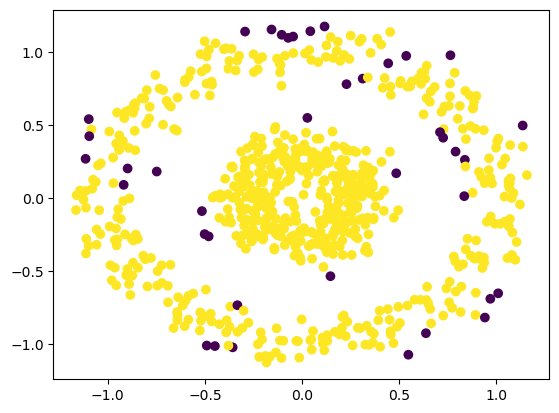

In [32]:
# All negatives labels are outliers, and everything else a normal datapoint
new_lables = np.where(dbscan.labels_ < 0, 0, 1)
plt.scatter(X[:,0], X[:,1], c=new_lables)

## Local Outlier Factor

In [33]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

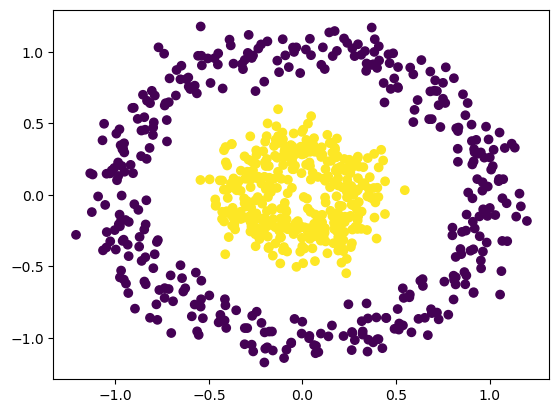

In [34]:
plt.scatter(X[:,0], X[:,1], c=y)

In [36]:
from sklearn.neighbors import LocalOutlierFactor

In [41]:
local_outlier_factor = LocalOutlierFactor(n_neighbors=20, algorithm='ball_tree', metric='minkowski')

In [42]:
# Minus ones are outliers
predictions = local_outlier_factor.fit_predict(X)

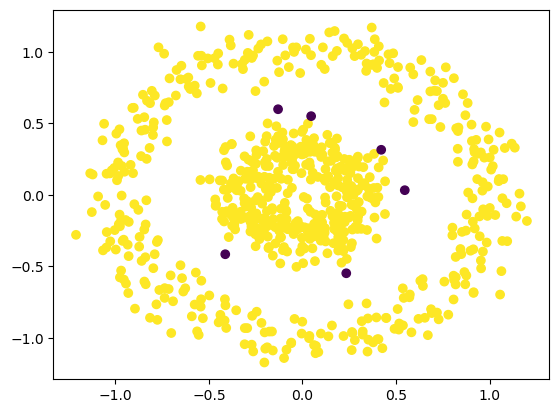

In [43]:
plt.scatter(X[:,0], X[:,1], c=predictions)